# Orogenic landscapes modelling

In this example, we simulate landscape evolution in response to two simple climatic scenarios: 
+ **uniform** and 
+ **orographic** precipitation. 

<div align="center">
    <img src="mountain/images/oro_rain.jpg" alt="orographic precipitation" width="450" height="200"/>
</div>

We investigate the drainage network dynamics and the steady-state fluvial patterns that emerge from an application of these climatic forcing mechanisms.

The first part of the scenario starts from a flat topography subjected to a constant and uniform rate of tectonic rock uplift (>1 mm/a) and precipitation (1 m/a). The domain is rectangular and the four edges are kept at a constant base-level elevation. The area is a 40x80 km domain. 

After 8 Ma, the second scenario is applied and consists in a linearly varying rainfall pattern corresponding to an orographic precipitation with the same uniform tectonic uplift rate. The Northern part of the domain is experiencing a 2 m/a precipitation rate and the Southern part is subject to a 0.1 m/a precipitation rate for the next 12 Ma. 

## Initial settings

For this model, we use the *stream power law sediment transport model* which scale the incision rate $E$ as a power function of surface water discharge $A$ and slope $S=\nabla z$:

$$ E = \kappa A^m (\nabla z)^n$$

where $\kappa$ is the erodibility coefficient dependent on lithology and mean precipitation rate, channel width, flood frequency, channel hydraulics.

The values given to these parameters ($\kappa$, $m$, $n$) need to be set in the **XmL** input file.

For this particular setting we do not need to record any deposition as the model is purely erosive. To speed up the model we turn off the deposition computation in **Badlands** by setting the **dep** element to *0* in the input file. 

## Starting pyBadlands

First we initialise the model and set the path to the **XmL** input file.

In [ ]:
from pyBadlands.model import Model as badlandsModel
import time

# Initialise model
model = badlandsModel()
# Define the XmL input file. This is where we point to things like the topography files we create!
model.load_xml('testOutput','mountain/mountain.xml',verbose=True)

You can edit the **XmL** configuration file at [mountain/mountain.xml](mountain/mountain.xml).

To view the complete **XmL** options you can follow this link to github page: [complete.xml](https://github.com/badlands-model/pyBadlands/blob/master/Examples/input_complete.xml).

Now you have ***built*** a base model, you can interrogate and adjust values as needed...

In [ ]:
#Adjust values in the pybadlands model

#Adjust m value
model.input.SPLm = 0.5

# Adjust erodibility
model.input.SPLero = 5.e-6 
model.flow.erodibility.fill(5.e-6)

# Adjust precipitation values based on given parameter
model.force.rainVal[:] = 10

#Get help for example by using
help(model.load_xml)

## Running pyBadlands

We can run the model for a given period. The end time in the **XmL** input file is set to _50M years_ but you might want to run the model for a coupled of iterations and check the output before running the model for the entire simulation time. This is done by putting the time in the **run_to_time** function. 

Here we go for the full time directly... it should take less than 5 minutes on a single processor if you keep the initial setting unchanged. 

In [ ]:
start = time.time()
model.run_to_time(1000000)
print 'time', time.time() - start

# Visualise in Paraview

For an in-depth visualisation of the model output it is recommended to install on your local machine a visualisation package such as [Paraview](http://www.paraview.org) or [Visit](https://wci.llnl.gov/simulation/computer-codes/visit/).

**Badlands** outputs are created in the directory you've specified in your **XmL** input file. In cases where you have ran several instances of the same input you will end up with multiple directories with the same name followed with the simulation number.

The folder contains xdmf series files:
+ **tin.series.xdmf** which will display the time series of surface evolution.
+ **flow.series.xdmf** which will display the time series of drainage network evolution.

## Elevation change

| Time step 25| Time step 160 | 
| :-------------: |:-------------:|
| <img src="mountain/images/step25.png" alt="Step 25" width="400" height="200" border="10" />| <img src="mountain/images/step160.png" alt="Step 160" width="400" height="200" border="10" /> | 

| Time step 250| Time step 400| 
| :-------------: |:-------------:|
| <img src="mountain/images/step250.png" alt="Step 250" width="400" height="200" border="10" /> | <img src="mountain/images/step400.png" alt="Step 400" width="400" height="200" border="10" />|

## Drainage network

| Time step 159| Time step 400 | 
| :-------------: |:-------------:|
| <img src="mountain/images/step159.png" alt="Step 159" width="400" height="200" border="10" />| <img src="mountain/images/step400b.png" alt="Step 400" width="400" height="200" border="10" /> | 


Using paraview you will be able to extract lots of information computed by badlands. There are additional details in the [Badlands companion](https://github.com/badlands-model/pyBadlands-Companion).


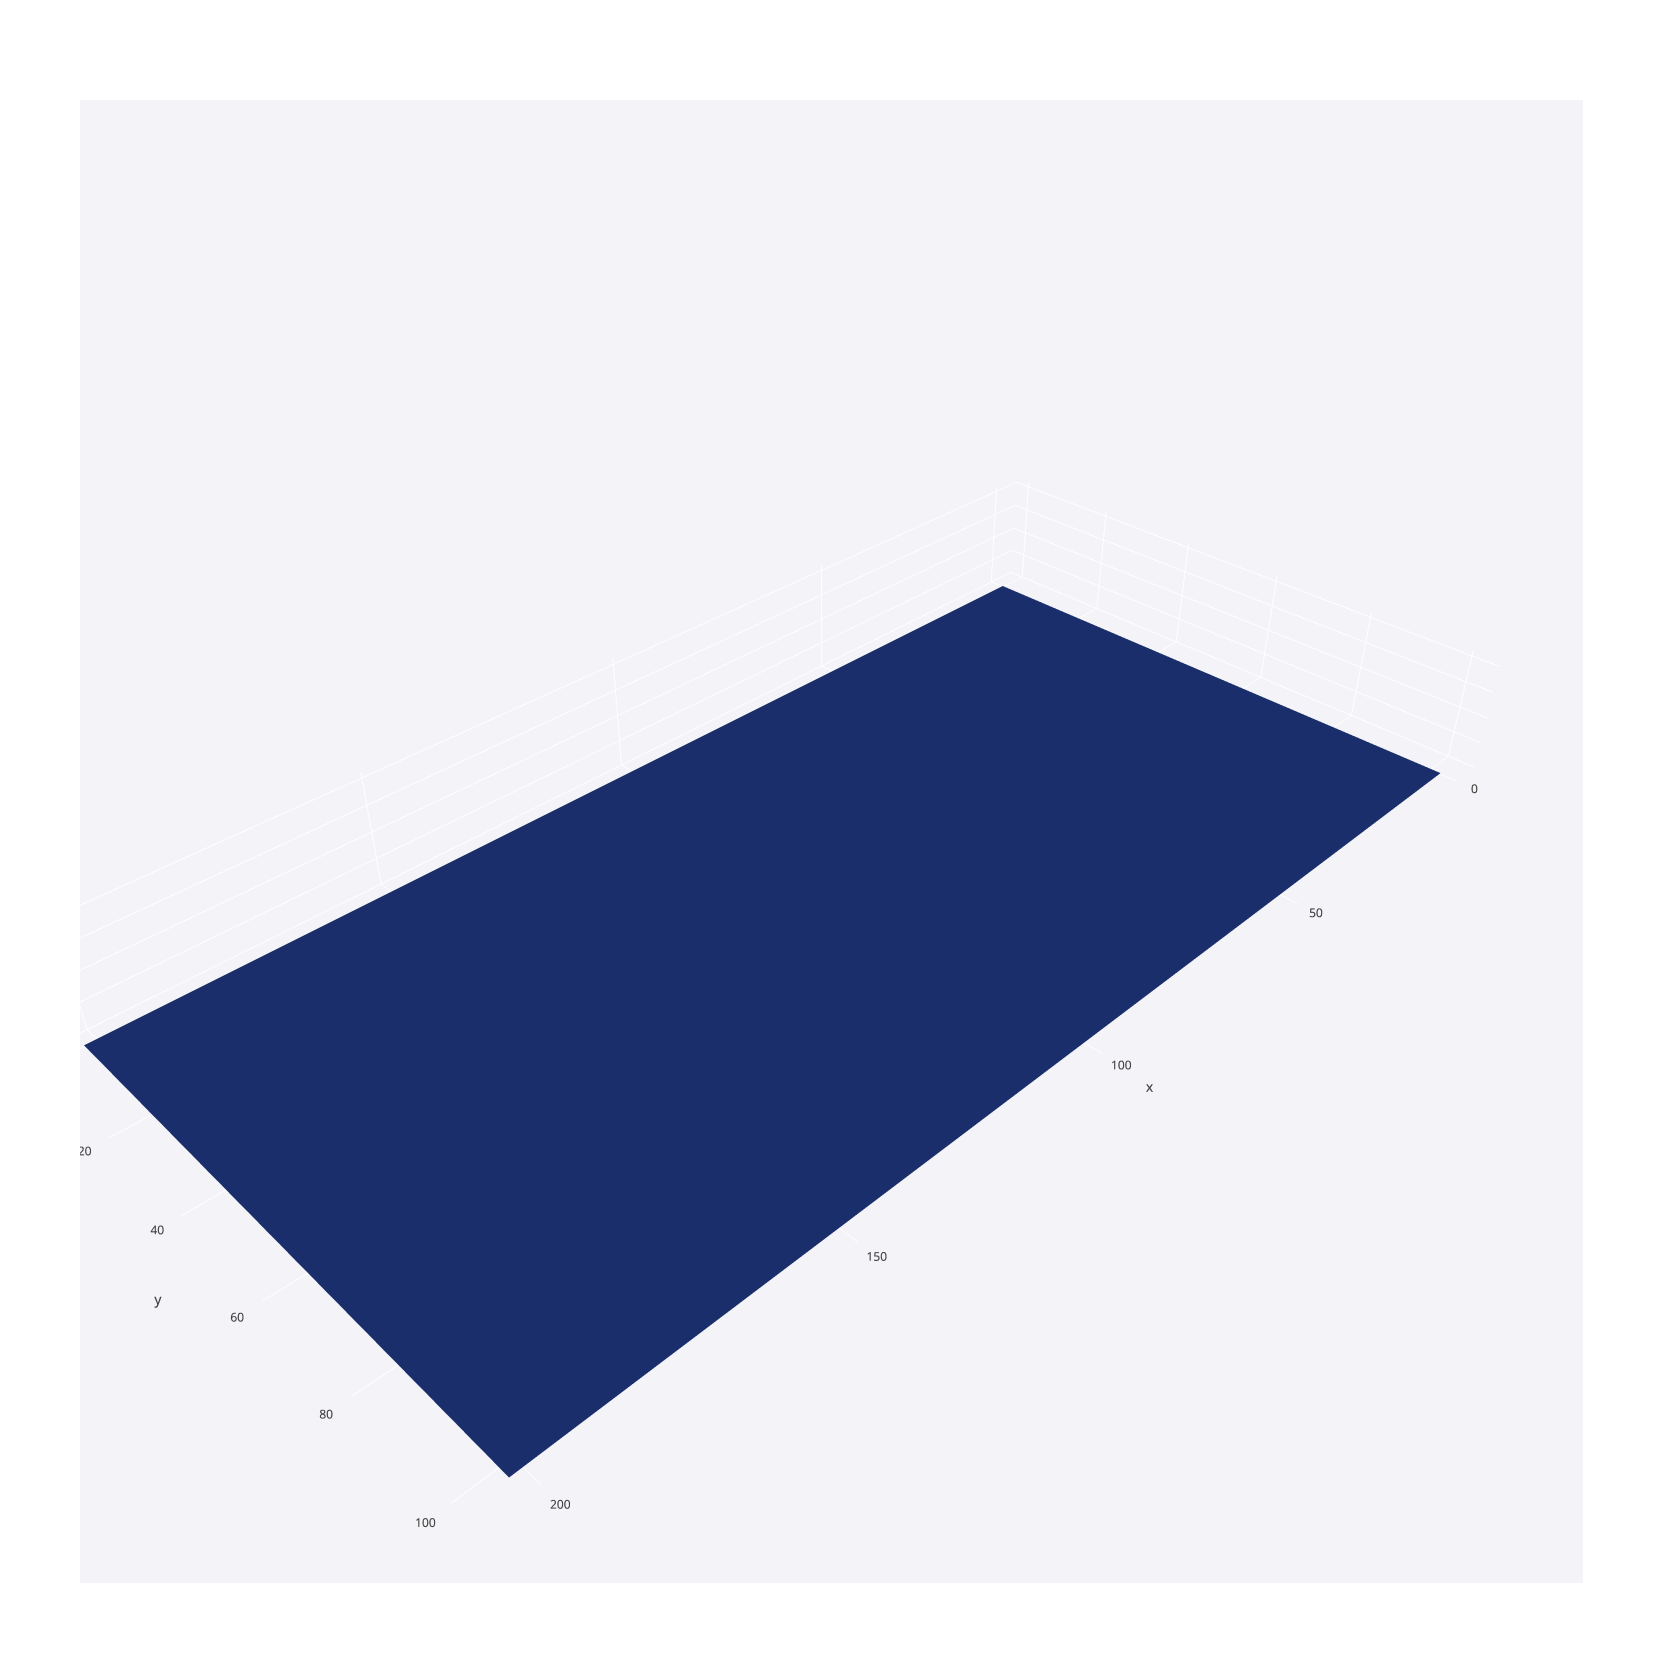

In [4]:
from IPython.display import Image
Image(filename="notebook_images/out.gif.png")